# 初学者向けPandas100本ノックver1.0.3

In [3]:
# ライブラリーの読み込み
import pandas as pd
import glob

# DataFrameの準備
df = pd.read_csv('./data/titanic3.csv')
df2 = pd.read_csv('./data/data1.csv')
df3 = pd.read_csv('./data/data1_2.csv')
df4 = pd.read_csv('./data/data1_3.csv')
df5 = pd.read_csv('./data/data2.csv',encoding='cp932')

# ラベリング (80 - 81)

In [4]:
# 【80】
# dfのsex列をラベルエンコーディングし、
# dfの先頭5行を表示
# (from sklearn.preprocessing import LabelEncoderをインポート)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #ラベルエンコーダのインスタンスを作成

df['sex'] = le.fit_transform(df['sex']) #エンコーディング
df.head()



,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# 【81】
# dfのsex列をOne-hotエンコーディングし、
# dfの先頭5行を表示

df = pd.get_dummies(df, columns=['sex'])
df.head()




,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_0,sex_1
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


# Pandasプロット (82 - 89)
Pandasプロットの機能については以下のサイトの説明が分かりやすいです  
[自調自考の旅](https://own-search-and-study.xyz/2016/08/03/pandas%E3%81%AEplot%E3%81%AE%E5%85%A8%E5%BC%95%E6%95%B0%E3%82%92%E4%BD%BF%E3%81%84%E3%81%93%E3%81%AA%E3%81%99/)

array([[<AxesSubplot:title={'center':'pclass'}>,
        <AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'body'}>,
        <AxesSubplot:title={'center':'sex_0'}>,
        <AxesSubplot:title={'center':'sex_1'}>]], dtype=object)

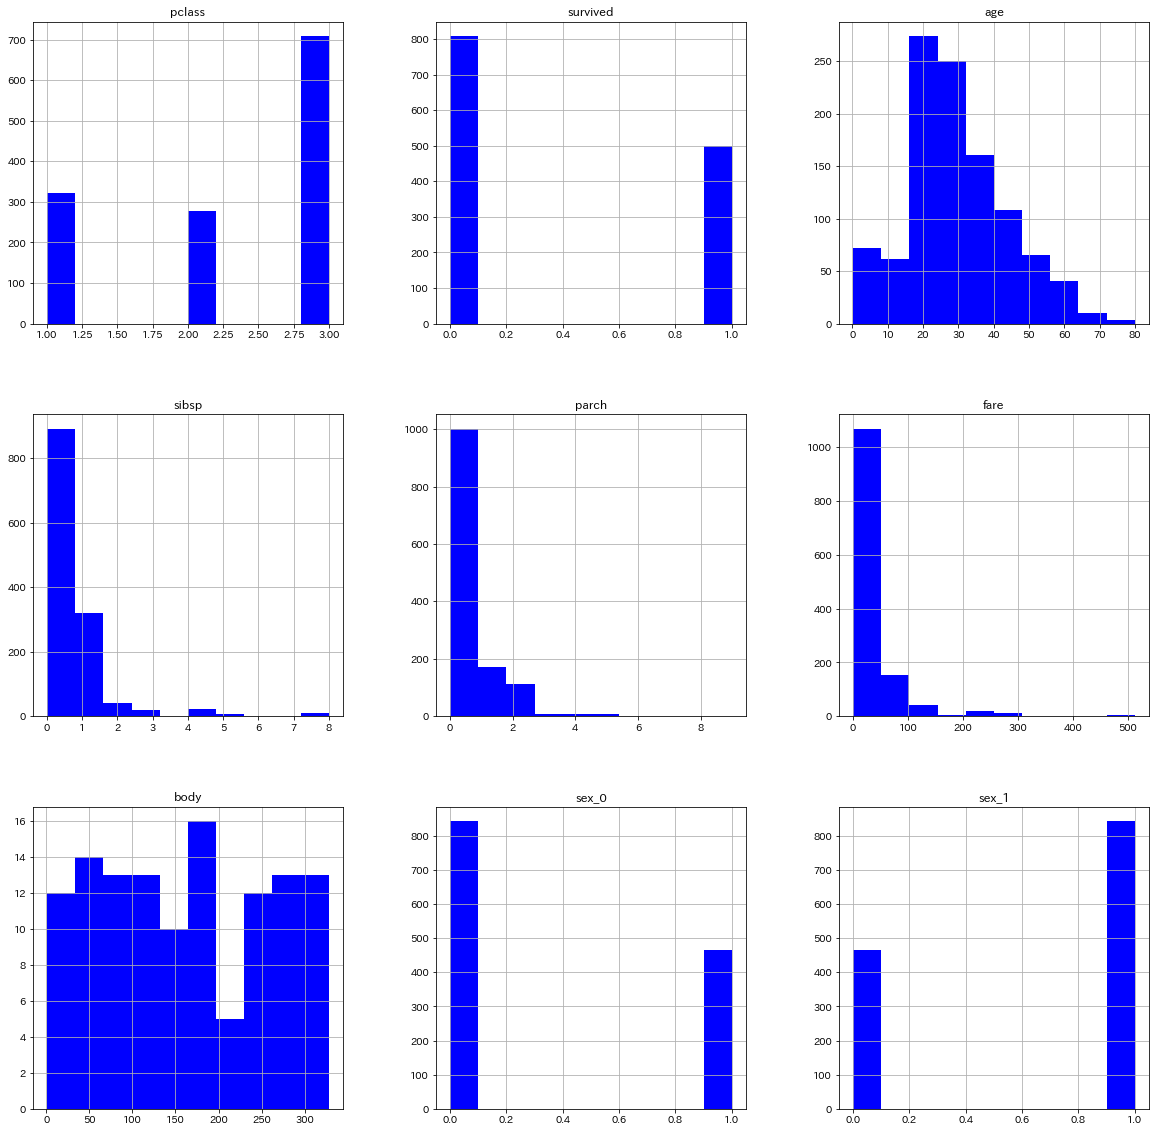

In [6]:
# 【82】
# dfのすべての数値列のヒストグラムを表示


df.hist(figsize=(20,20), color='b')



<AxesSubplot:ylabel='Frequency'>

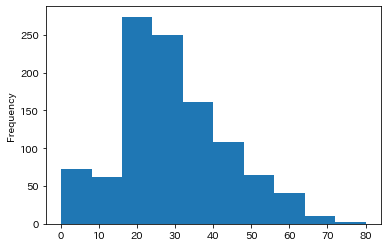

In [7]:
# 【83】
# dfのage列をヒストグラムで表示

df['age'].plot(kind='hist')




<AxesSubplot:xlabel='name'>

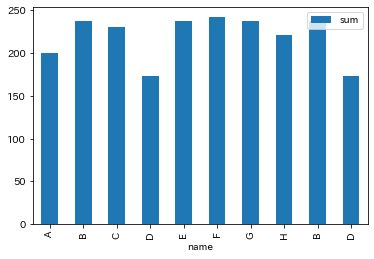

In [8]:
# 【84】
# df2のname列の要素ごとの3科目合計得点を棒グラフで表示

df2['sum'] = df2.iloc[:,2:5].sum(axis=1) #3科目合計の列を作成
df2[['name','sum']].plot(kind='bar',x=df2.columns[0])



<AxesSubplot:xlabel='name'>

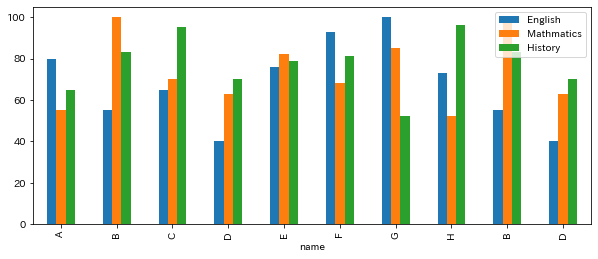

In [9]:
# 【85】
# df2のname列の要素ごとの3科目を棒グラフで
# 並べて表示

df2[['name','English','Mathmatics','History']].plot(kind='bar',figsize=(10,4),x=df2.columns[0])





<AxesSubplot:xlabel='name'>

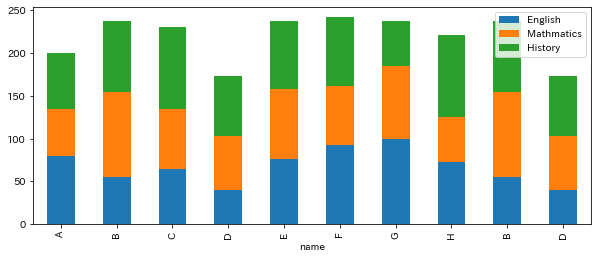

In [10]:
# 【86】
# df2のname列の要素ごとの3科目を積み上げ棒グラフで表示

df2[['name','English','Mathmatics','History']].plot(kind='bar',figsize=(10,4),
                                                    x=df2.columns[0],stacked=True)







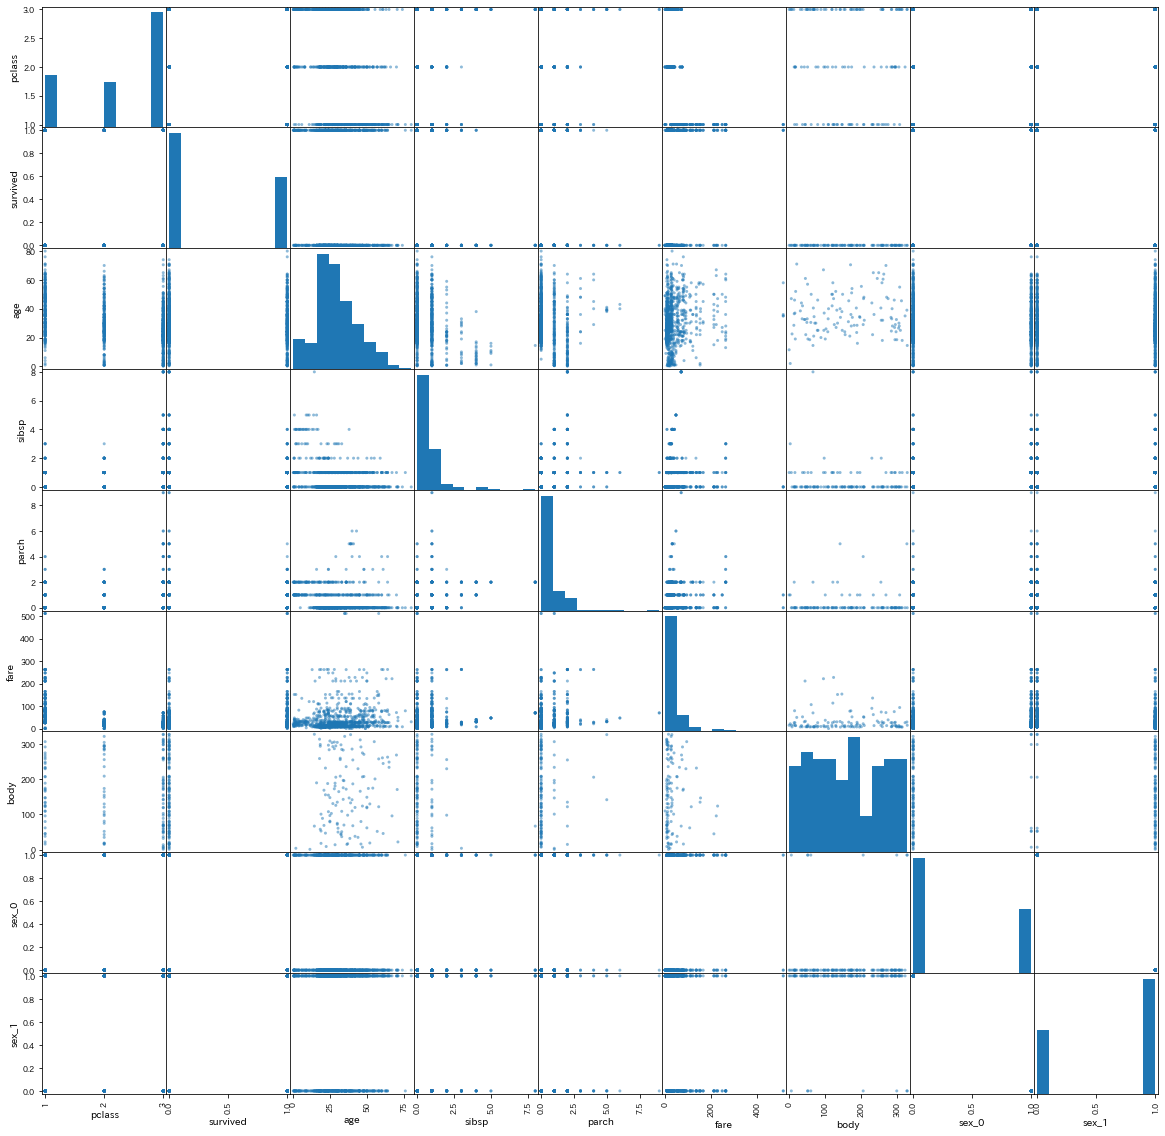

In [11]:
# 【87】
# dfの各列間の散布図を表示
# (from pandas.plotting import scatter_matrixをインポート)

%matplotlib inline
from pandas.plotting import scatter_matrix

_ = scatter_matrix(df,figsize=(20,20))



<AxesSubplot:xlabel='age', ylabel='fare'>

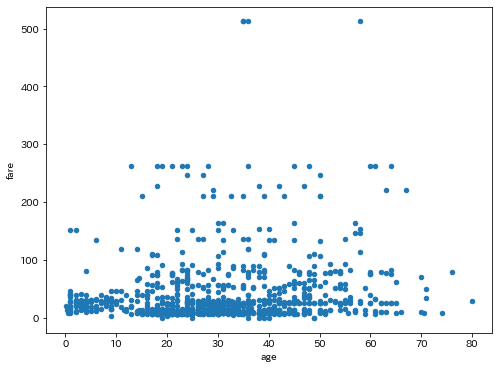

In [12]:
# 【88】
# dfのage列とfare列で散布図を作成

df.plot(kind='scatter',x='age',y='fare',figsize=(8,6))



<AxesSubplot:title={'center':'age-fare scatter'}, xlabel='age', ylabel='fare'>

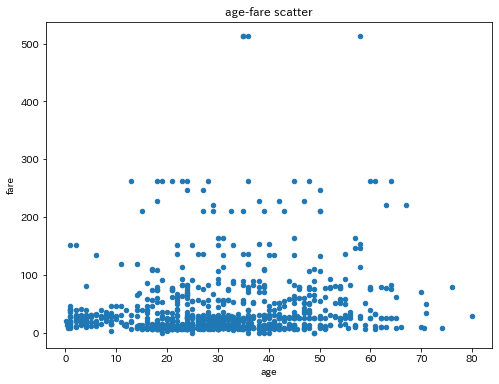

In [13]:
# 【89】
# 【88】で描画したグラフに「age-fare scatter」という
# グラフタイトルをつける

df.plot(kind='scatter',x='age',y='fare',figsize=(8,6),title='age-fare scatter')





